<a href="https://colab.research.google.com/github/LerinaMM/unicorn_data_analysis/blob/main/Unicorn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://drive.google.com/file/d/1ZT6f2nrr16ZQdPtNm-mXLR-maMjtLQ_N/view?usp=share_link

# Captar os dados do google drive

In [29]:
!wget -P "/content/drive/MyDrive/Datasets/Unicorn/unicorn.csv" #Voce aqui ao lado colocar o caminho do site na qual voce pegou o dado

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


# Importar Bibliotecas

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Verificando os dados

In [32]:
#Verificando os dados
Dados = pd.read_csv('/content/drive/MyDrive/Datasets/Unicorn/unicorn.csv')

In [3]:
Dados.head()

,Company,Valuation($B),Date Joined,Country,City,Industry,Investors,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,﻿ByteDance,$140,04-07-2017,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group,NaN,NaN
1,SpaceX,$127,12-01-2012,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN,NaN,NaN
2,SHEIN,$100,07-03-2018,China,Shenzhen,E-commerce &amp; direct-to-consumer,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,NaN,NaN,NaN
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,NaN,NaN,NaN
4,Canva,$40,01-08-2018,Australia,Surry Hills,Internet software &amp; services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,NaN,NaN,NaN


In [4]:
#Ultimos dados do conjunto
Dados.tail()

,Company,Valuation($B),Date Joined,Country,City,Industry,Investors,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
1199,LeadSquared,$1,6/21/2022,India,Bengaluru,Internet software &amp; services,Gaja Capital Partners,Stakeboat Capital,WestBridge Capital,NaN,NaN,NaN
1200,FourKites,$1,6/21/2022,United States,Chicago,Supply chain,logistics,&amp; delivery,Hyde Park Venture Partners,Bain Capital Ventures,Hyde Park Angels,NaN
1201,VulcanForms,$1,07-05-2022,United States,Burlington,Supply chain,logistics,&amp; delivery,Eclipse Ventures,D1 Capital Partners,Industry Ventures,NaN
1202,SingleStore,$1,07-12-2022,United States,San Francisco,Data management &amp; analytics,Google Ventures,Accel,Data Collective,NaN,NaN,NaN
1203,Unstoppable Domains,$1,7/27/2022,United States,Las Vegas,Internet software &amp; services,Boost VC,Draper Associates,Gaingels,NaN,NaN,NaN


# Informações do conjunto de Dados

In [5]:
#quantidade de dados do conjunto
Dados.shape

(1204, 12)

In [9]:
Dados.describe()

,Company,Valuation($B),Date Joined,Country,City,Industry,Investors,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
count,1204,1204,1204,1204,1187,1204,1203,1147,1056,72,62,3
unique,1201,229,715,49,282,16,583,632,663,67,59,3
top,Branch,$1,7/13/2021,United States,San Francisco,Fintech,logistics,&amp; delivery,Tiger Global Management,Softbank Group,Google Ventures,Redpoint e.ventures
freq,2,270,9,651,169,252,67,67,20,2,3,1


In [35]:
#Nome das colunas disponíveis

Dados.columns

Index(['Company', ' Valuation($B)', ' Date Joined', ' Country', ' City',
       ' Industry', ' Investors', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [36]:
#Verificação se temos dados duplicadas

Dados.duplicated().sum()

0

Verificamos que nao possuimos dados duplicados no dataset

In [37]:
# Colocar  a informação NaN nas celulas vazias

Dados[' City'] = Dados[' City'].fillna('NaN')
Dados[' Investors'] = Dados[' Investors'].fillna('NaN')

In [38]:
# Verificar colunas com valores nulos

Dados.isnull().sum()

Company              0
 Valuation($B)       0
 Date Joined         0
 Country             0
 City                0
 Industry            0
 Investors           0
Unnamed: 7          57
Unnamed: 8         148
Unnamed: 9        1132
Unnamed: 10       1142
Unnamed: 11       1201
dtype: int64

As colunas com valores nulos serão todas as colunas a partir da **Unnamed: 7**

In [39]:
#Descarte das colunas sem dados

Dados.drop('Unnamed: 8', axis='columns', inplace=True)
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1204 non-null   object
 1    Valuation($B)  1204 non-null   object
 2    Date Joined    1204 non-null   object
 3    Country        1204 non-null   object
 4    City           1204 non-null   object
 5    Industry       1204 non-null   object
 6    Investors      1204 non-null   object
 7   Unnamed: 7      1147 non-null   object
 8   Unnamed: 9      72 non-null     object
 9   Unnamed: 10     62 non-null     object
 10  Unnamed: 11     3 non-null      object
dtypes: object(11)
memory usage: 103.6+ KB


In [40]:
#Retiradas de colunas nao utilizadas - Coloca colchetes se quiser retirar várias
Dados.drop(['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], axis='columns', inplace=True)
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1204 non-null   object
 1    Valuation($B)  1204 non-null   object
 2    Date Joined    1204 non-null   object
 3    Country        1204 non-null   object
 4    City           1204 non-null   object
 5    Industry       1204 non-null   object
 6    Investors      1204 non-null   object
 7   Unnamed: 7      1147 non-null   object
dtypes: object(8)
memory usage: 75.4+ KB


In [41]:
Dados.drop('Unnamed: 7', axis='columns', inplace=True)
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1204 non-null   object
 1    Valuation($B)  1204 non-null   object
 2    Date Joined    1204 non-null   object
 3    Country        1204 non-null   object
 4    City           1204 non-null   object
 5    Industry       1204 non-null   object
 6    Investors      1204 non-null   object
dtypes: object(7)
memory usage: 66.0+ KB


In [42]:
Dados

,Company,Valuation($B),Date Joined,Country,City,Industry,Investors
0,﻿ByteDance,$140,04-07-2017,China,Beijing,Artificial intelligence,Sequoia Capital China
1,SpaceX,$127,12-01-2012,United States,Hawthorne,Other,Founders Fund
2,SHEIN,$100,07-03-2018,China,Shenzhen,E-commerce &amp; direct-to-consumer,Tiger Global Management
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,Khosla Ventures
4,Canva,$40,01-08-2018,Australia,Surry Hills,Internet software &amp; services,Sequoia Capital China
...,...,...,...,...,...,...,...
1199,LeadSquared,$1,6/21/2022,India,Bengaluru,Internet software &amp; services,Gaja Capital Partners
1200,FourKites,$1,6/21/2022,United States,Chicago,Supply chain,logistics
1201,VulcanForms,$1,07-05-2022,United States,Burlington,Supply chain,logistics
1202,SingleStore,$1,07-12-2022,United States,San Francisco,Data management &amp; analytics,Google Ventures


In [43]:
#Informações dos conjuntos de Dados

Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1204 non-null   object
 1    Valuation($B)  1204 non-null   object
 2    Date Joined    1204 non-null   object
 3    Country        1204 non-null   object
 4    City           1204 non-null   object
 5    Industry       1204 non-null   object
 6    Investors      1204 non-null   object
dtypes: object(7)
memory usage: 66.0+ KB


In [44]:
# Informações sobre quantidades/valores relativos a cada coluna

Dados.nunique()

Company           1201
 Valuation($B)     229
 Date Joined       715
 Country            49
 City              283
 Industry           16
 Investors         584
dtype: int64

In [46]:
#Países que estão disponíveis no conjunto de dados

Dados[' Country'].unique()

array(['China', 'United States', 'Australia', 'United Kingdom', 'India',
       'Indonesia', 'Germany', 'Turkey', 'Hong Kong', 'Seychelles',
       'Sweden', 'Mexico', 'Estonia', 'Canada', 'South Korea',
       'Netherlands', 'France', 'Israel', 'Finland', 'Colombia',
       'Belgium', 'Brazil', 'Denmark', 'Switzerland', 'Lithuania',
       'Austria', 'Ireland', 'Singapore', 'Vietnam',
       'United Arab Emirates', 'Argentina', 'Spain', 'Japan',
       'Luxembourg', 'Nigeria', 'Philippines', 'Croatia', 'Senegal',
       'Malaysia', 'Bermuda', 'Norway', 'South Africa', 'Ecuador',
       'Chile', 'Thailand', 'Czech Republic', 'Liechtenstein', 'Italy',
       'London'], dtype=object)

In [47]:
#Países que possui empresas Unicórnios no conjunto de dados

Dados[' Country'].value_counts()

United States           651
China                   172
India                    70
United Kingdom           49
Germany                  29
France                   25
Israel                   23
Canada                   20
Brazil                   16
Singapore                14
South Korea              14
Mexico                    8
Australia                 8
Indonesia                 7
Hong Kong                 7
Sweden                    7
Netherlands               7
Ireland                   6
Switzerland               6
Japan                     6
Spain                     5
Finland                   4
Norway                    4
Belgium                   3
Turkey                    3
Thailand                  3
United Arab Emirates      3
Colombia                  3
Chile                     2
Philippines               2
South Africa              2
Italy                     2
Croatia                   2
Lithuania                 2
Vietnam                   2
Austria             

# Quantidade de Startups por Países

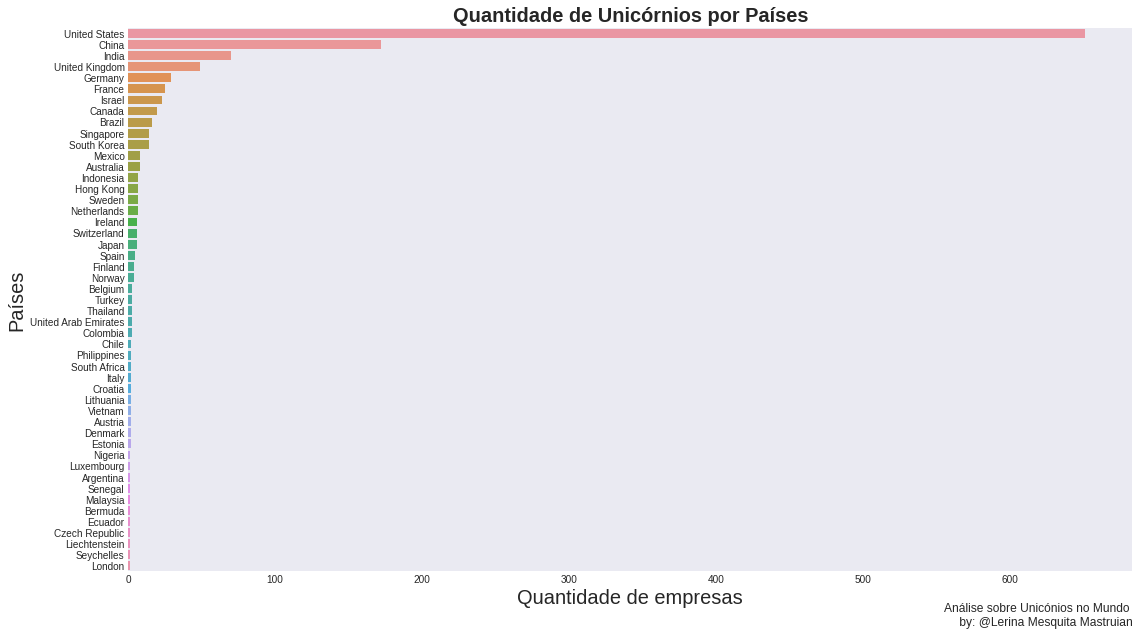

In [48]:
#plt.plot (Dados[' Country'])
#plt.title('Quantidade de Startups por Paises')
#plt.figure(figsize=(15,6))

# Tamanho
plt.figure( figsize=(18, 10) )

# estilo
plt.style.use('seaborn-dark')

x = Dados[' Country'].value_counts().values
y = Dados[' Country'].value_counts().index
plt.title('Quantidade de Unicórnios por Países', fontsize=20, fontweight='bold')
sns.barplot( x=x, y=y ) 
plt.xlabel('Quantidade de empresas', fontsize=20)
plt.ylabel('Países', fontsize=20)

plt.annotate(
    'Análise sobre Unicónios no Mundo \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.10), xycoords='axes fraction', ha='right', fontsize=12);

plt.show()

In [49]:
#Vamos verificar as informações de Cidades onde se localizam as startups

In [50]:
Dados[' City'].unique()

array(['Beijing', 'Hawthorne', 'Shenzhen', 'San Francisco', 'Surry Hills',
       'London', 'Cary', 'Jacksonville', 'Bengaluru', 'Shanghai',
       'Jakarta', 'Philadelphia', 'New York', 'Munich', 'Waltham',
       'San Diego', 'Roseville', 'Changsha', 'Istanbul', 'Luohe',
       'Cheung Sha Wan', 'Walpole', 'Victoria', 'Boston', 'Glendale',
       'Berlin', 'Palo Alto', 'Stockholm', 'Kirkland', 'Gurugram',
       'Lerma de Villada', 'Mountain View', 'Fremont', 'Irvine',
       'Tallinn', 'San Jose', 'San Mateo', 'Chicago', 'Mumbai', 'Irving',
       'Vancouver', 'Santa Clara', 'Pittsburgh', 'Seoul', 'Hangzhou',
       'Toronto', 'Changzhou', 'Amsterdam', 'Paris', 'Los Angeles',
       'Tel Aviv', 'Hoboken', 'Brooklyn', 'Helsinki', 'Pflugerville',
       'Oakland', 'Bogota', 'Brussels', 'Atlanta', 'Campinas',
       'Sao Paulo', 'Melbourne', 'Gurgaon', 'Noida', 'Bellevue',
       'Montreal', 'Copenhagen', 'Geneva', 'Burlingame', 'Vilnius',
       'Faridabad', 'Seattle', 'Guangzhou', 'D

In [51]:
Dados[' City'].value_counts()

San Francisco    169
New York         116
Beijing           62
Shanghai          43
London            39
                ... 
Leudelange         1
Goleta             1
Lagos              1
Pennsauken         1
Las Vegas          1
Name:  City, Length: 283, dtype: int64

A cidade que possui o maior numero de Unicórnios no mundo é a cidade de **São Francisco** nos Estados Unidos

In [52]:
Dados_1 = Dados[' City'].value_counts()

In [53]:
Dados_1.to_frame()

,City
San Francisco,169
New York,116
Beijing,62
Shanghai,43
London,39
...,...
Leudelange,1
Goleta,1
Lagos,1
Pennsauken,1


Podemos notar que as cinco primeiras cidades do mundo, que possuem mais Unicórnios, 2 (São Francisco e New York) estão localizadas nos estados unidos, 2 (Pequim e Shangai) na China e Londres na Inglaterra.

In [54]:
#Inserindo um index no lado esquerdo

Dados_1 = Dados_1.reset_index()

In [55]:
Dados_1

,index,City
0,San Francisco,169
1,New York,116
2,Beijing,62
3,Shanghai,43
4,London,39
...,...,...
278,Leudelange,1
279,Goleta,1
280,Lagos,1
281,Pennsauken,1


In [56]:
#Renomeando as colunas

Dados_1 = Dados_1.rename(columns = {'index':'Cidade', ' City':'Contagem'})

In [57]:
Dados_1

,Cidade,Contagem
0,San Francisco,169
1,New York,116
2,Beijing,62
3,Shanghai,43
4,London,39
...,...,...
278,Leudelange,1
279,Goleta,1
280,Lagos,1
281,Pennsauken,1


# Quantidade de Unicórnios por cidades

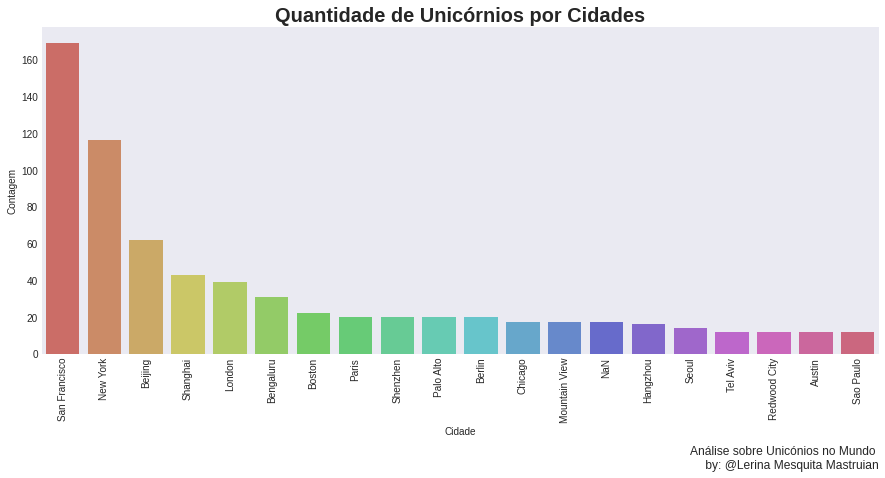

In [58]:
plt.figure(figsize=(15,6))
plt.title('Quantidade de Unicórnios por Cidades', fontsize=20, fontweight='bold')
sns.barplot(x = Dados_1['Cidade'].head(20), y = Dados_1['Contagem'].head(20), data = Dados_1, 
             palette = 'hls')
plt.xticks(rotation = 90)
plt.annotate(
    'Análise sobre Unicónios no Mundo \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.35), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()

In [59]:
#Tipos de industria
Dados[' Industry'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce &amp; direct-to-consumer', 'Fintech',
       'Internet software &amp; services', 'Supply chain',
       'Data management &amp; analytics', 'Edtech', 'Hardware',
       'Consumer &amp; retail', 'Health', 'Auto &amp; transportation',
       'Travel', 'Cybersecurity', 'Mobile &amp; telecommunications',
       'Artificial Intelligence'], dtype=object)

In [60]:
#Tipos de industria

Dados[ ' Industry'].value_counts()

Fintech                                252
Internet software &amp; services       228
E-commerce &amp; direct-to-consumer    109
Health                                  95
Artificial intelligence                 79
Supply chain                            67
Other                                   66
Cybersecurity                           58
Data management &amp; analytics         45
Hardware                                40
Mobile &amp; telecommunications         40
Auto &amp; transportation               37
Edtech                                  32
Consumer &amp; retail                   31
Travel                                  14
Artificial Intelligence                 11
Name:  Industry, dtype: int64

# Unicórnios por tipo de atividade

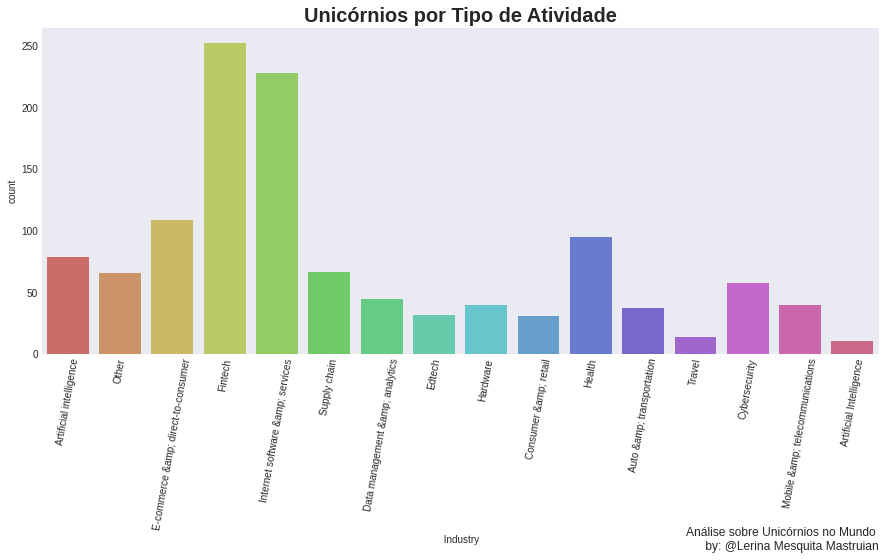

In [61]:
#Grafico dos resultados do tipo de industria

plt.figure(figsize=(15,6))
plt.title('Unicórnios por Tipo de Atividade', fontsize=20, fontweight='bold')
sns.countplot(Dados[' Industry'], data = Dados, 
             palette = 'hls')
plt.xticks(rotation = 80)
plt.annotate(
    'Análise sobre Unicórnios no Mundo \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.60), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()

Podemos destacar que os principais negócios onde possuem a maior quantidade de unicórnios são as Fintechs, Internet Software & amp services, Ecommerce e Health

In [62]:
#

Dados[['Currency', 'Value']] = Dados[' Valuation($B)'].str.extract(r'([^\d]*)([\d,\.]+)')

In [63]:
Dados

,Company,Valuation($B),Date Joined,Country,City,Industry,Investors,Currency,Value
0,﻿ByteDance,$140,04-07-2017,China,Beijing,Artificial intelligence,Sequoia Capital China,$,140
1,SpaceX,$127,12-01-2012,United States,Hawthorne,Other,Founders Fund,$,127
2,SHEIN,$100,07-03-2018,China,Shenzhen,E-commerce &amp; direct-to-consumer,Tiger Global Management,$,100
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,Khosla Ventures,$,95
4,Canva,$40,01-08-2018,Australia,Surry Hills,Internet software &amp; services,Sequoia Capital China,$,40
...,...,...,...,...,...,...,...,...,...
1199,LeadSquared,$1,6/21/2022,India,Bengaluru,Internet software &amp; services,Gaja Capital Partners,$,1
1200,FourKites,$1,6/21/2022,United States,Chicago,Supply chain,logistics,$,1
1201,VulcanForms,$1,07-05-2022,United States,Burlington,Supply chain,logistics,$,1
1202,SingleStore,$1,07-12-2022,United States,San Francisco,Data management &amp; analytics,Google Ventures,$,1


# Transformando o formato de data para um unico padrão

In [64]:
# Transformando o formato de data para um unico padrão

Dados[' Date Joined'] = pd.to_datetime(Dados[' Date Joined'])

In [65]:
Dados

,Company,Valuation($B),Date Joined,Country,City,Industry,Investors,Currency,Value
0,﻿ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,$,140
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,Founders Fund,$,127
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce &amp; direct-to-consumer,Tiger Global Management,$,100
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,$,95
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software &amp; services,Sequoia Capital China,$,40
...,...,...,...,...,...,...,...,...,...
1199,LeadSquared,$1,2022-06-21,India,Bengaluru,Internet software &amp; services,Gaja Capital Partners,$,1
1200,FourKites,$1,2022-06-21,United States,Chicago,Supply chain,logistics,$,1
1201,VulcanForms,$1,2022-07-05,United States,Burlington,Supply chain,logistics,$,1
1202,SingleStore,$1,2022-07-12,United States,San Francisco,Data management &amp; analytics,Google Ventures,$,1


# Criando uma nova coluna chamada "Year"

In [66]:
#Criando uma nova coluna chamada "Year"

Dados['Year'] = Dados[' Date Joined'].dt.year

In [67]:
Dados

,Company,Valuation($B),Date Joined,Country,City,Industry,Investors,Currency,Value,Year
0,﻿ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,$,140,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,Founders Fund,$,127,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce &amp; direct-to-consumer,Tiger Global Management,$,100,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,$,95,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software &amp; services,Sequoia Capital China,$,40,2018
...,...,...,...,...,...,...,...,...,...,...
1199,LeadSquared,$1,2022-06-21,India,Bengaluru,Internet software &amp; services,Gaja Capital Partners,$,1,2022
1200,FourKites,$1,2022-06-21,United States,Chicago,Supply chain,logistics,$,1,2022
1201,VulcanForms,$1,2022-07-05,United States,Burlington,Supply chain,logistics,$,1,2022
1202,SingleStore,$1,2022-07-12,United States,San Francisco,Data management &amp; analytics,Google Ventures,$,1,2022


In [68]:
#Verificar os anos presentes de surgimento dos unicórnios por ano

Dados['Year'].unique()

array([2017, 2012, 2018, 2014, 2019, 2016, 2021, 2022, 2015, 2020, 2013,
       2011, 2007])

# Quantidade de Unicórnios por ano

In [69]:
Dados['Year'].value_counts()

2021    524
2022    258
2020    106
2019    100
2018     97
2017     42
2015     34
2016     21
2014     12
2012      4
2013      3
2011      2
2007      1
Name: Year, dtype: int64

# Distribuição dos dados de surgimento dos Unicórnios com o passar dos anos

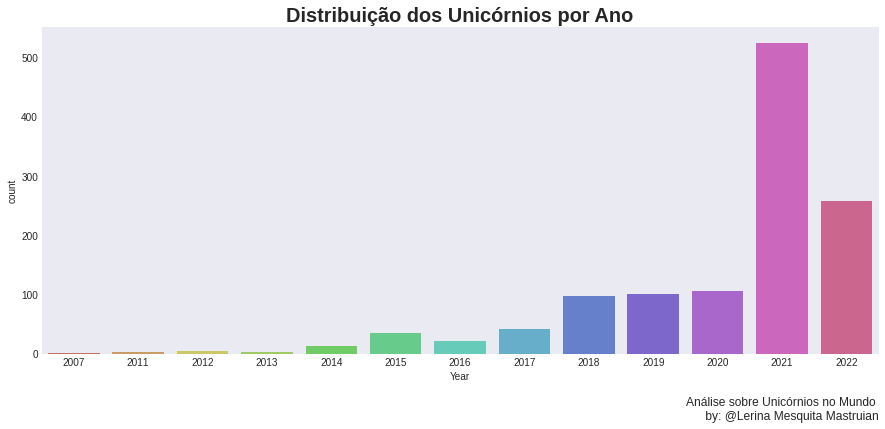

In [70]:
#Verificar a distribuição dos dados de surgimento dos Unicórnios com o passar dos anos

plt.figure(figsize=(15,6))
plt.title('Distribuição dos Unicórnios por Ano', fontsize=20, fontweight='bold')
sns.countplot(Dados['Year'], data = Dados, 
             palette = 'hls')
plt.xticks(rotation = 360)
plt.annotate(
    'Análise sobre Unicórnios no Mundo \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.20), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()

A maior quantidade de unicórnios surgiram no ano de 2021.

Podemos notar que de 2021 para 2022 tivemos uma diminuição de mais de 50% referente a quantidade das empresas Unicórnio no mundo

In [71]:
#Verificação da característica das variáveis dos conjuntos de dados

Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         1204 non-null   object        
 1    Valuation($B)  1204 non-null   object        
 2    Date Joined    1204 non-null   datetime64[ns]
 3    Country        1204 non-null   object        
 4    City           1204 non-null   object        
 5    Industry       1204 non-null   object        
 6    Investors      1204 non-null   object        
 7   Currency        1204 non-null   object        
 8   Value           1204 non-null   object        
 9   Year            1204 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 94.2+ KB


In [72]:
Dados['Value'] = Dados['Value'].astype(float)

In [73]:
Dados.sort_values(by='Value', ascending=False, inplace=True)

# Valor monetário das principais Unicórnios

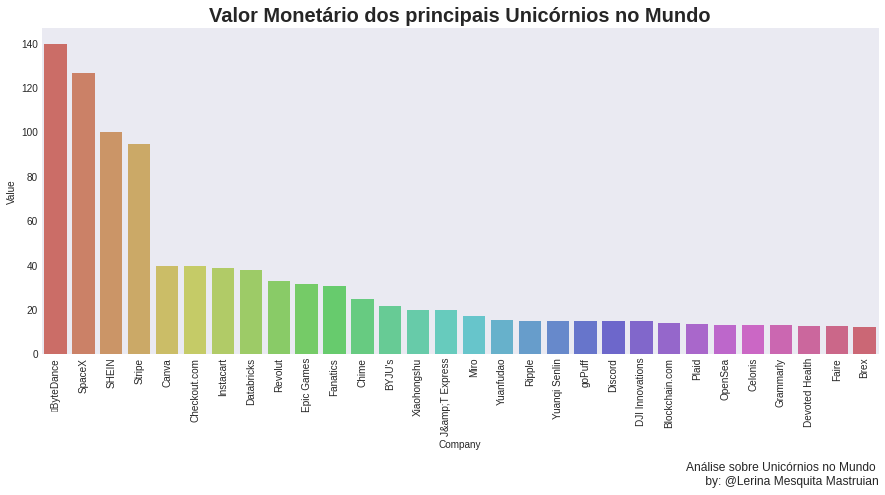

In [74]:
#Verificando o valor monetário das principais unicornios

plt.figure(figsize=(15,6))
plt.title('Valor Monetário dos principais Unicórnios no Mundo', fontsize=20, fontweight='bold')
sns.barplot(x=Dados['Company'].head(30), y=Dados['Value'].head(30), data = Dados, 
             palette = 'hls')
plt.xticks(rotation = 90)
plt.annotate(
    'Análise sobre Unicórnios no Mundo \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.40), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()

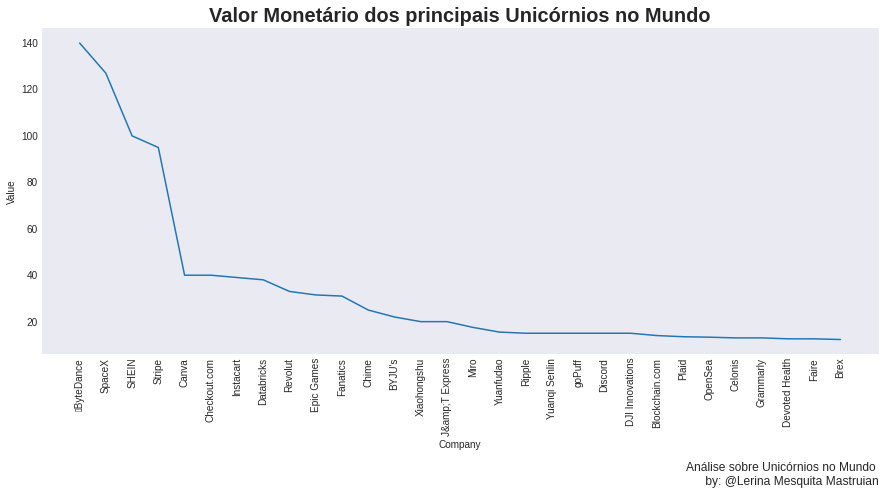

In [75]:
#Criando uma outra visão sobre o valor monetário das principais unicornios

plt.figure(figsize=(15,6))
plt.title('Valor Monetário dos principais Unicórnios no Mundo', fontsize=20, fontweight='bold')
sns.lineplot(x=Dados['Company'].head(30), y=Dados['Value'].head(30), data = Dados, 
             palette = 'hls')
plt.xticks(rotation = 90)
plt.annotate(
    'Análise sobre Unicórnios no Mundo \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.40), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()

# Avaliação principais atividades versus valor monetário dos Unicórnios


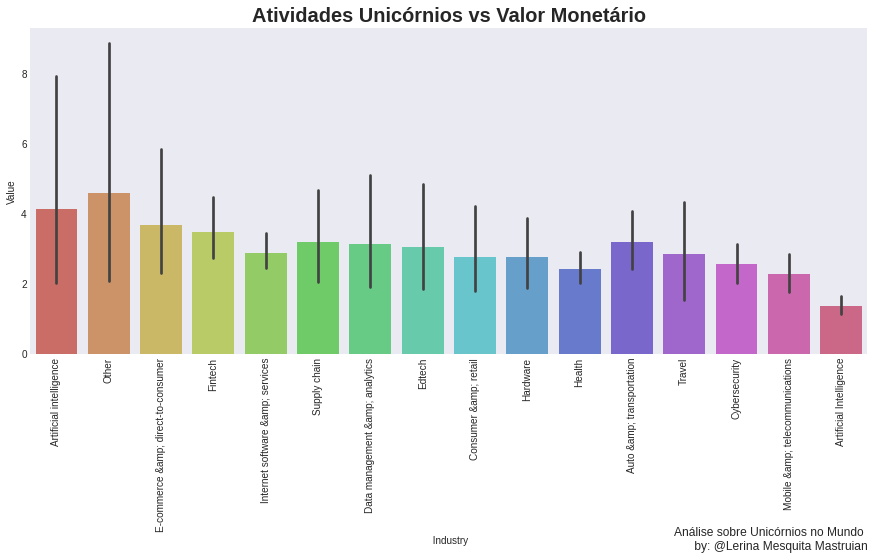

In [76]:
#Verificação avaliando principais atividades versus valor monetário dos unicornios

plt.figure(figsize=(15,6))
plt.title('Atividades Unicórnios vs Valor Monetário', fontsize=20, fontweight='bold')
sns.barplot(x=Dados[' Industry'], y=Dados['Value'], data = Dados, 
             palette = 'hls')
plt.xticks(rotation = 90)
plt.annotate(
    'Análise sobre Unicórnios no Mundo \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.60), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()

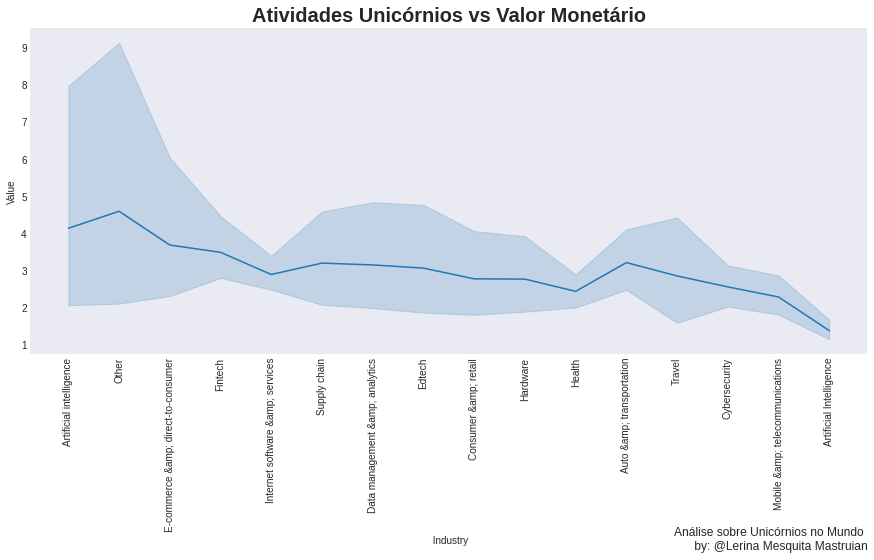

In [77]:
#NOVA VISUALIZAÇÃO: Verificação avaliando principais atividades versus valor monetário dos unicornios

plt.figure(figsize=(15,6))
plt.title('Atividades Unicórnios vs Valor Monetário', fontsize=20, fontweight='bold')
sns.lineplot(x=Dados[' Industry'], y=Dados['Value'], data = Dados, 
             palette = 'hls')
plt.xticks(rotation = 90)
plt.annotate(
    'Análise sobre Unicórnios no Mundo \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.60), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()

# Ano do surgimento do Unicórnio versus valor monetário


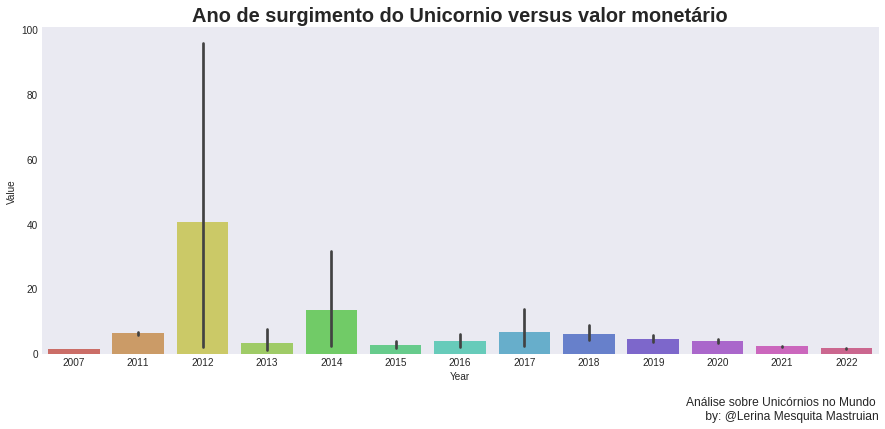

In [78]:
#Verificação avaliando ano de surgimento do Unicornio versus valor monetário

plt.figure(figsize=(15,6))
plt.title('Ano de surgimento do Unicornio versus valor monetário', fontsize=20, fontweight='bold')
sns.barplot(x=Dados['Year'], y=Dados['Value'], data = Dados, 
             palette = 'hls')
plt.xticks(rotation = 360)
plt.annotate(
    'Análise sobre Unicórnios no Mundo \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.20), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()

Podemos notar que o ano de 2012 os Unicórnios possuiam o maior valor monetário, onde conforme os anos foram passando o valor diminuiu.

Outra questão, de 2021 para 2022 a redução da quantidade de unicornios foi praticamente 50% sendo que o valor monetário do conjunto se tornou praticamente igual.

# Principais investidores e valor investido

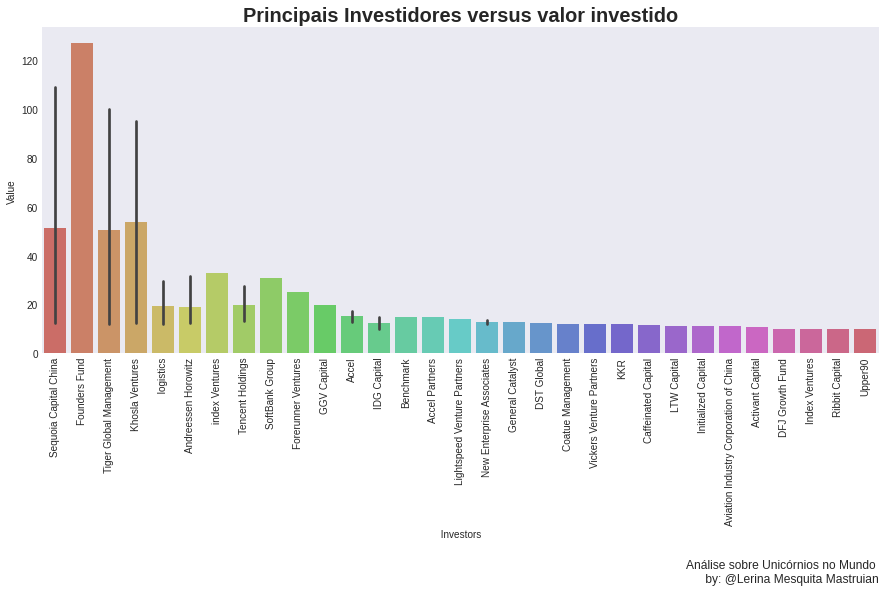

In [79]:
#Verificação dos principais investidores e valor investido

plt.figure(figsize=(15,6))
plt.title('Principais Investidores versus valor investido', fontsize=20, fontweight='bold')
sns.barplot(x=Dados[' Investors'].head(50), y=Dados['Value'].head(50), data = Dados, 
             palette = 'hls')
plt.xticks(rotation = 90)
plt.annotate(
    'Análise sobre Unicórnios no Mundo \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.70), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()

# Avaliação Países versus valor monetário

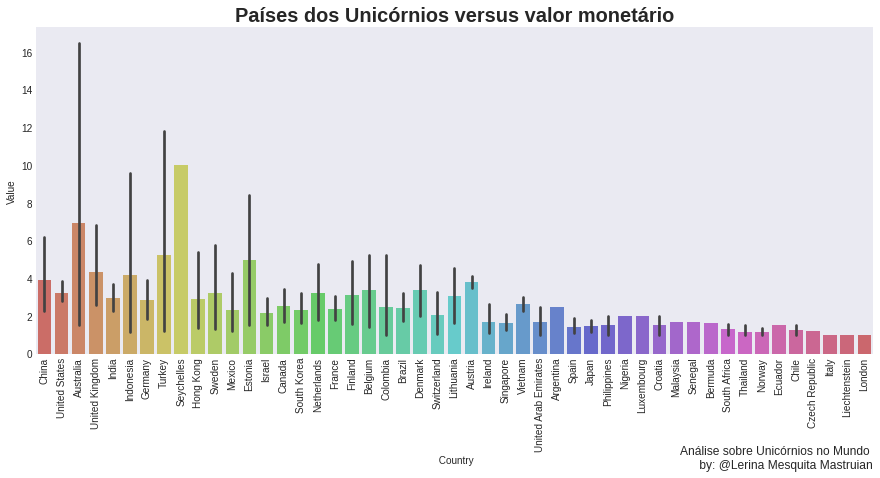

In [80]:
#Avaliação Paises versus valor monetário

plt.figure(figsize=(15,6))
plt.title('Países dos Unicórnios versus valor monetário', fontsize=20, fontweight='bold')
sns.barplot(x=Dados[' Country'], y=Dados['Value'], data = Dados, 
             palette = 'hls')
plt.xticks(rotation = 90)
plt.annotate(
    'Análise sobre Unicórnios no Mundo \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.35), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()

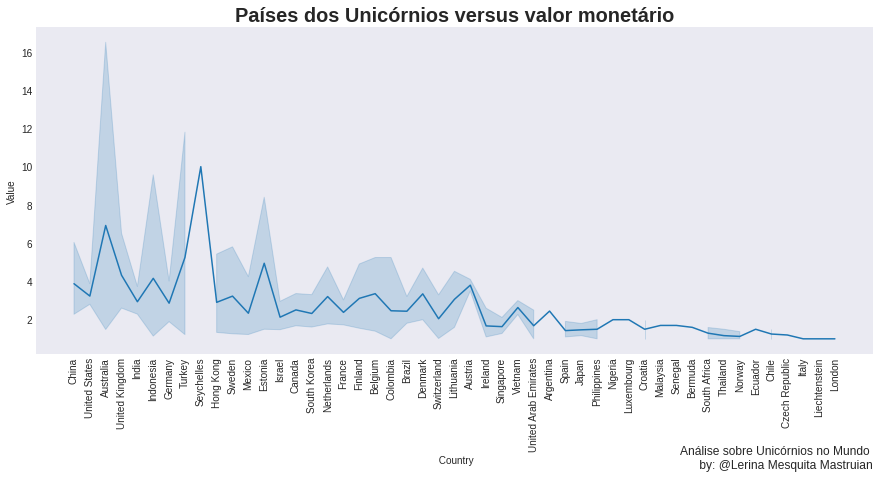

In [87]:
#NOVA VISUALIZAÇÃO: Avaliação Países dos Unicornios versus valor monetário

plt.figure(figsize=(15,6))
plt.title('Países dos Unicórnios versus valor monetário', fontsize=20, fontweight='bold')
sns.lineplot(x=Dados[' Country'], y=Dados['Value'], data = Dados, 
             palette = 'hls')
plt.xticks(rotation = 90)
plt.annotate(
    'Análise sobre Unicórnios no Mundo \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.35), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()

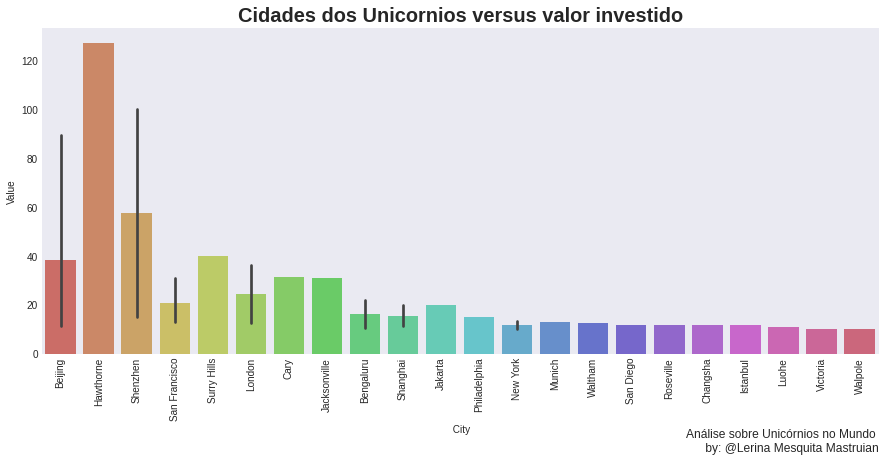

In [85]:
#Verificação das cidades que investiram os maiores valores

plt.figure(figsize=(15,6))
plt.title('Cidades dos Unicornios versus valor investido', fontsize=20, fontweight='bold')
sns.barplot(x=Dados[' City'].head(50), y=Dados['Value'].head(50), data = Dados, 
             palette = 'hls')
plt.xticks(rotation = 90)
plt.annotate(
    'Análise sobre Unicórnios no Mundo \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()

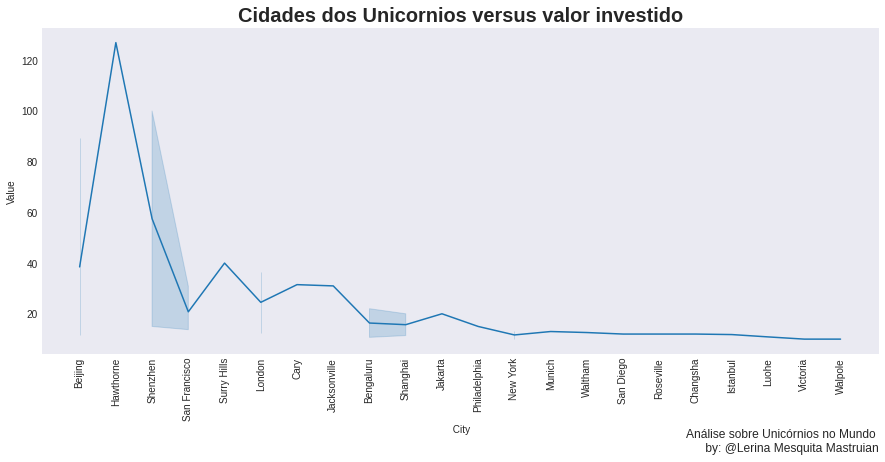

In [86]:
#NOVA VISUALIZAÇÃO: Verificação das cidades que investiram os maiores valores

plt.figure(figsize=(15,6))
plt.title('Cidades dos Unicornios versus valor investido', fontsize=20, fontweight='bold')
sns.lineplot(x=Dados[' City'].head(50), y=Dados['Value'].head(50), data = Dados, 
             palette = 'hls')
plt.xticks(rotation = 90)
plt.annotate(
    'Análise sobre Unicórnios no Mundo \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()